In [1]:
# Preliminary
import torch

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math

In [2]:
a = torch.linspace(0, 2 * math.pi, steps = 25, requires_grad = True)
print(a)


tensor([0.0000, 0.2618, 0.5236, 0.7854, 1.0472, 1.3090, 1.5708, 1.8326, 2.0944,
        2.3562, 2.6180, 2.8798, 3.1416, 3.4034, 3.6652, 3.9270, 4.1888, 4.4506,
        4.7124, 4.9742, 5.2360, 5.4978, 5.7596, 6.0214, 6.2832],
       requires_grad=True)


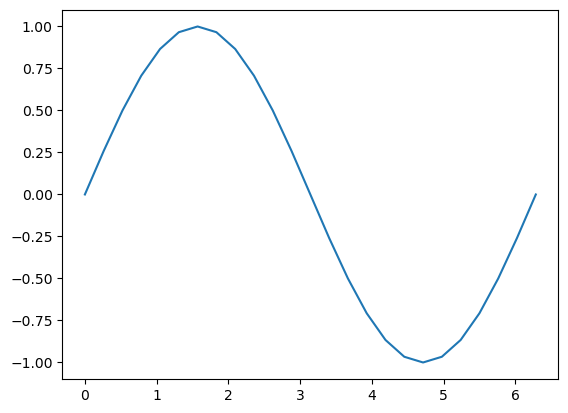

In [3]:
b = torch.sin(a)
# the tensors have gradients saved, so we need to remove them first using detach
# so that plt can plot them 
plt.plot(a.detach(), b.detach())

In [4]:
# notice that b has all of its gradients saved...
print(b)
# perform some more computations on b
c = 2 * b
print(c)
d = c + 1
print(d)

out = d.sum()
print(out)


tensor([ 0.0000e+00,  2.5882e-01,  5.0000e-01,  7.0711e-01,  8.6603e-01,
         9.6593e-01,  1.0000e+00,  9.6593e-01,  8.6603e-01,  7.0711e-01,
         5.0000e-01,  2.5882e-01, -8.7423e-08, -2.5882e-01, -5.0000e-01,
        -7.0711e-01, -8.6603e-01, -9.6593e-01, -1.0000e+00, -9.6593e-01,
        -8.6603e-01, -7.0711e-01, -5.0000e-01, -2.5882e-01,  1.7485e-07],
       grad_fn=<SinBackward0>)
tensor([ 0.0000e+00,  5.1764e-01,  1.0000e+00,  1.4142e+00,  1.7321e+00,
         1.9319e+00,  2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,
         1.0000e+00,  5.1764e-01, -1.7485e-07, -5.1764e-01, -1.0000e+00,
        -1.4142e+00, -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00,
        -1.7321e+00, -1.4142e+00, -1.0000e+00, -5.1764e-01,  3.4969e-07],
       grad_fn=<MulBackward0>)
tensor([ 1.0000e+00,  1.5176e+00,  2.0000e+00,  2.4142e+00,  2.7321e+00,
         2.9319e+00,  3.0000e+00,  2.9319e+00,  2.7321e+00,  2.4142e+00,
         2.0000e+00,  1.5176e+00,  1.0000e+00,  4.8236e-01, 

In [5]:
# Notice that each grad_fn stored allows you to trace back the computation, using the 
# next_functions method
print(d.grad_fn)
print(d.grad_fn.next_functions)
print(d.grad_fn.next_functions[0][0].next_functions)
# etc...

((<MulBackward0 object at 0x75c316f08310>, 0), (None, 0))
((<SinBackward0 object at 0x75c316f08310>, 0), (None, 0))


None
None
None
tensor([ 2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,  1.0000e+00,
         5.1764e-01, -8.7423e-08, -5.1764e-01, -1.0000e+00, -1.4142e+00,
        -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00, -1.7321e+00,
        -1.4142e+00, -1.0000e+00, -5.1764e-01,  2.3850e-08,  5.1764e-01,
         1.0000e+00,  1.4142e+00,  1.7321e+00,  1.9319e+00,  2.0000e+00])


/tmp/ipykernel_615376/1207288228.py:3: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /build/python-pytorch/src/pytorch-rocm/build/aten/src/ATen/core/TensorBody.h:489.)
  print(d.grad)
/tmp/ipykernel_615376/1207288228.py:4: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. S

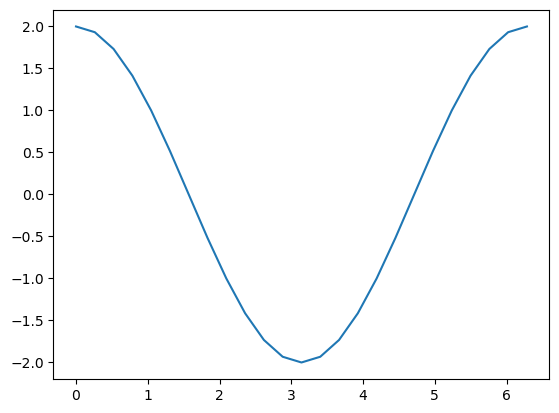

In [ ]:
# This means we can simply call the backward() method, and then check the gradients via grad()
out.backward()
# this is really funky, backward() is called on the final tensor, and then the gradients are stored in the
# .grad attribute of the INPUT tensor on the computation graph
# print(d.grad)
# print(c.grad)
# print(b.grad)
print(a.grad)

plt.plot(a.detach(), a.grad.detach())

In [ ]:
# Example in a neural network

batch_size = 16
dim_in = 1000
hidden_size = 100
dim_out = 10

# Note that within a subclass of torch.nn.Module, all layers (tensors) are 
# automatically specified with requires_grad=True, because it is assumed that
# the weights will be learned via backpropagation

class TinyModel(torch.nn.Module):
    # initialisation of the model, this defines the model architecture
    def __init__(self):
        # what is super?
        super(TinyModel, self).__init__()
        # super just delegates the call to the parent class
        # i.e. identical to 
        # super().__init__()

        self.layer1 = torch.nn.Linear(dim_in, hidden_size)
        self.relu = torch.nn.ReLU()
        self.layer2 = torch.nn.Linear(hidden_size, dim_out)
        
    # define the forward pass
    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x

some_input = torch.randn(batch_size, dim_in, requires_grad = False)
ideal_output = torch.randn(batch_size, dim_out, requires_grad = False)

model = TinyModel()

In [18]:
# View and verify that no gradients have been computed yet
print(model.layer2.weight[0][0:10])
print(model.layer2.weight.grad)

tensor([ 0.0835, -0.0745,  0.0522, -0.0324,  0.0894,  0.0996,  0.0005,  0.0802,
        -0.0885,  0.0755], grad_fn=<SliceBackward0>)
None


In [19]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

prediction = model(some_input)

# MSE loss
loss = (ideal_output - prediction).pow(2).sum()
print(loss)

tensor(143.2574, grad_fn=<SumBackward0>)


In [ ]:
loss.backward()
print(model.layer2.weight[0][0:10])
print(model.layer2.weight.grad[0][0:10])

# gradients have been backpropagated, but we still need to update the parameters
# using the optimizer

tensor([ 0.0835, -0.0745,  0.0522, -0.0324,  0.0894,  0.0996,  0.0005,  0.0802,
        -0.0885,  0.0755], grad_fn=<SliceBackward0>)
tensor([-0.5511,  0.0309,  0.3439,  0.0538, -1.0029,  2.6592, -1.3879,  2.3152,
         6.5635, -0.3776])


In [26]:
optimizer.step()
print(model.layer2.weight[0][0:10])
print(model.layer2.weight.grad[0][0:10])
# the weights have changed, but the gradients have not
# remember to optimizer.zero_grad() before calling loss.backward() again
# or the gradients will accumulate
optimizer.zero_grad(set_to_none=False)

tensor([ 0.0846, -0.0745,  0.0515, -0.0325,  0.0914,  0.0943,  0.0033,  0.0756,
        -0.1016,  0.0762], grad_fn=<SliceBackward0>)
tensor([-0.5511,  0.0309,  0.3439,  0.0538, -1.0029,  2.6592, -1.3879,  2.3152,
         6.5635, -0.3776])


In [32]:
# Autograd Profiler
# This is a tool for profiling the memory usage of the autograd engine
x = torch.randn(2, 3, requires_grad = True)
y = torch.randn(2, 3, requires_grad = True)
z = torch.randn(2, 3, requires_grad = True)

with torch.autograd.profiler.profile(use_device = device.type) as prf:
    for _ in range(1000):
        z = (z / x) * y

print(prf.key_averages().table(sort_by = "self_cpu_time_total"))



-------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
         Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg     Self CUDA   Self CUDA %    CUDA total  CUDA time avg    # of Calls  
-------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
    aten::div        50.82%       2.127ms        50.82%       2.127ms       2.127us       5.043ms        50.05%       5.043ms       5.043us          1000  
    aten::mul        49.18%       2.058ms        49.18%       2.058ms       2.058us       5.033ms        49.95%       5.033ms       5.033us          1000  
-------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
Self CPU time total: 4.186ms
Self CUDA time total: 10.076ms



In [ ]:
# High level API
# This autograd framework as a byproduct also allows us to easily calculate gradients more
# generally
def exp_adder(x, y):
    return 2 * x.exp() + 3 * y

inputs = (torch.rand(1), torch.rand(1))
# input
print(inputs)
# jacobian at the values of the input
torch.autograd.functional.jacobian(exp_adder, inputs)
# hessian at the values of the input
torch.autograd.functional.hessian(exp_adder, inputs)

# directly calculating the vector-Jacobian product is also possible
def do_some_doubling(x):
    y = x * 2
    while y.data.norm() < 1000:
        y = y * 2
    return y

inputs = torch.randn(3)
my_gradients = torch.tensor([0.1, 1.0, 0.0001])
torch.autograd.functional.vjp(do_some_doubling, inputs, v=my_gradients)

(tensor([0.9752]), tensor([0.2511]))


((tensor([[5.3034]]), tensor([[0.]])), (tensor([[0.]]), tensor([[0.]])))